# Run MCMC sampling
# Light minimal NO geometry

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
import numpy as np

from Likelihood import LEff
from mcmc_utils import light_minimal_mcmc

from multiprocessing import Pool
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
hierarchy = 'light'
D_or_M = 'majorana'
distance = 'log'
smoothing_pars = (0.1, 0.1)

In [4]:
spec = 'minimal no geometry'

In [5]:
this_dark_nus_mcmc = light_minimal_mcmc(hierarchy, D_or_M, title_addition=spec,
                                   distance='log', smoothing_pars=(0.1, 0.1))
df = this_dark_nus_mcmc.provide_df('cut_based')

light majorana


In [6]:
ndim = 4
from ctau_utils import ctau_light
from const import alphaQED
def light_minimal_posterior_no_geometry(parameters):
    '''Posterior in the light minimal model with no geometry: parameters = [m4, mz, log10_Vmu4, log10_epsilon]
       It uses global pars to speed up parallel computation'''
    if (parameters[0] < this_dark_nus_mcmc.exp_analysis_obj.m4_limits[0]) or\
       (parameters[0] > this_dark_nus_mcmc.exp_analysis_obj.m4_limits[1]) or\
       (parameters[1] < this_dark_nus_mcmc.exp_analysis_obj.mz_limits[0]) or\
       (parameters[1] > this_dark_nus_mcmc.exp_analysis_obj.mz_limits[1]) or\
       (parameters[0] <= parameters[1]) or\
       (parameters[2] <= np.log10(this_dark_nus_mcmc.exp_analysis_obj.lower_bound_Vmu4)) or\
       (parameters[2] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.upper_bound_Vmu4)) or\
       (parameters[3] <= np.log10(this_dark_nus_mcmc.exp_analysis_obj.lower_bound_epsilon)) or\
       (parameters[3] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.upper_bound_epsilon)):
        return -np.inf, -np.inf, -np.inf, -np.inf
    else:
        actual_Vmu4 = 10**parameters[2]
        actual_Vmu4_alpha_epsilon2 = actual_Vmu4 * alphaQED * 10**(2*parameters[3])
        ctau = ctau_light(parameters[0], 
                          parameters[1], 
                          actual_Vmu4, 
                          D_or_M)
        this_mu = actual_Vmu4_alpha_epsilon2/this_dark_nus_mcmc.exp_analysis_obj.Vmu4_alpha_epsilon2
        mu, sigma2 = this_dark_nus_mcmc.exp_analysis_obj.kde_n_events(df=df,
                                                         m4mz=(parameters[0], parameters[1]),
                                                         ctau=None,
                                                         mu=this_mu,
                                                         distance=this_dark_nus_mcmc.distance,
                                                         smoothing=this_dark_nus_mcmc.smoothing_pars)
        return LEff(0, mu, sigma2), mu, sigma2, ctau

labels = ['m4', 'mz', 'log10_Vmu4', 'log10_epsilon']
blobs_dtype = [('mu', float), ('sigma2', float), ('ctau', float)]

In [7]:
this_dark_nus_mcmc.set_posterior(light_minimal_posterior_no_geometry, 
                                 ndim, 
                                 labels=labels)

In [8]:
n_walkers = ndim**2
n_samples = 1
with Pool() as pool:
    this_dark_nus_mcmc.initialise_mcmc(n_walkers, pool,
                                       set_backend=True, reset_backend=False, 
                                       blobs_dtype=blobs_dtype)
    this_dark_nus_mcmc.run_mcmc(n_samples)

100%|██████████| 1/1 [00:01<00:00,  1.15s/it]


/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/emcee/autocorr.py:36: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]
N/50 = 0;
tau: [1.69265512 1.82960891 1.76445601 1.80435323]
N/50 = 1;
tau: [3.69744522 4.20971574 3.68873982 3.80188705]
N/50 = 2;
tau: [8.87600981 7.70202517 8.31362884 8.48179671]
N/50 = 4;
tau: [17.36374332 19.27736104 18.55299645 18.00483926]
N/50 = 8;
tau: [34.98577449 32.99793484 28.69567486 34.57573339]
N/50 = 17;
tau: [46.11044623 52.64801827 49.30225883 61.47902929]
N/50 = 36;
tau: [76.77428184 67.36652026 79.86393066 80.87322236]
N/50 = 76;
tau: [104.66131959  91.74149386  88.39712634  95.90763207]


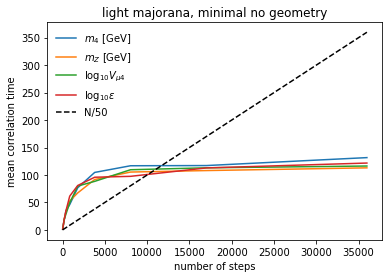

In [9]:
this_dark_nus_mcmc.compute_autocorrelation_time(store=True)

In [10]:
this_dark_nus_mcmc.get_samples(discard=2, thin=1)

/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(<Figure size 1080x504 with 5 Axes>,
 array([<AxesSubplot:ylabel='$m_4$ [GeV]'>,
        <AxesSubplot:ylabel='$m_Z$ [GeV]'>,
        <AxesSubplot:ylabel='$\\log_{10}V_{\\mu 4}$'>,
        <AxesSubplot:ylabel='$\\log_{10}\\epsilon$'>,
        <AxesSubplot:xlabel='step number', ylabel='log(p)'>], dtype=object))

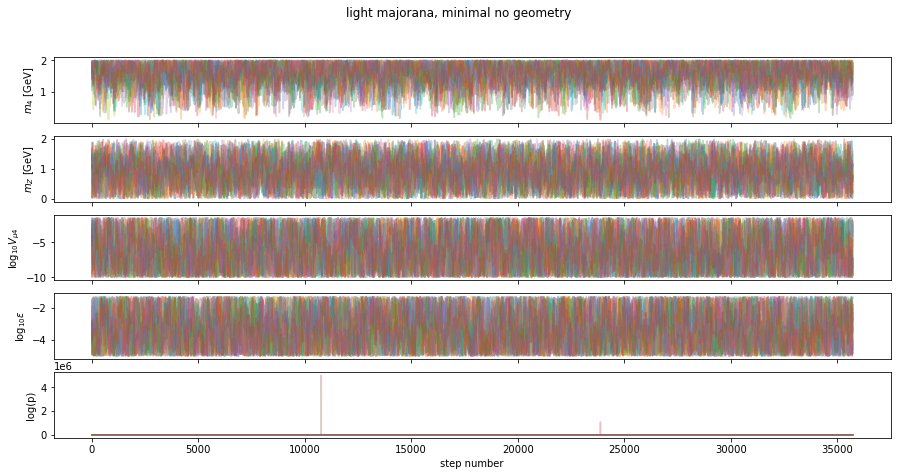

In [11]:
this_dark_nus_mcmc.plot_chains(store=True)

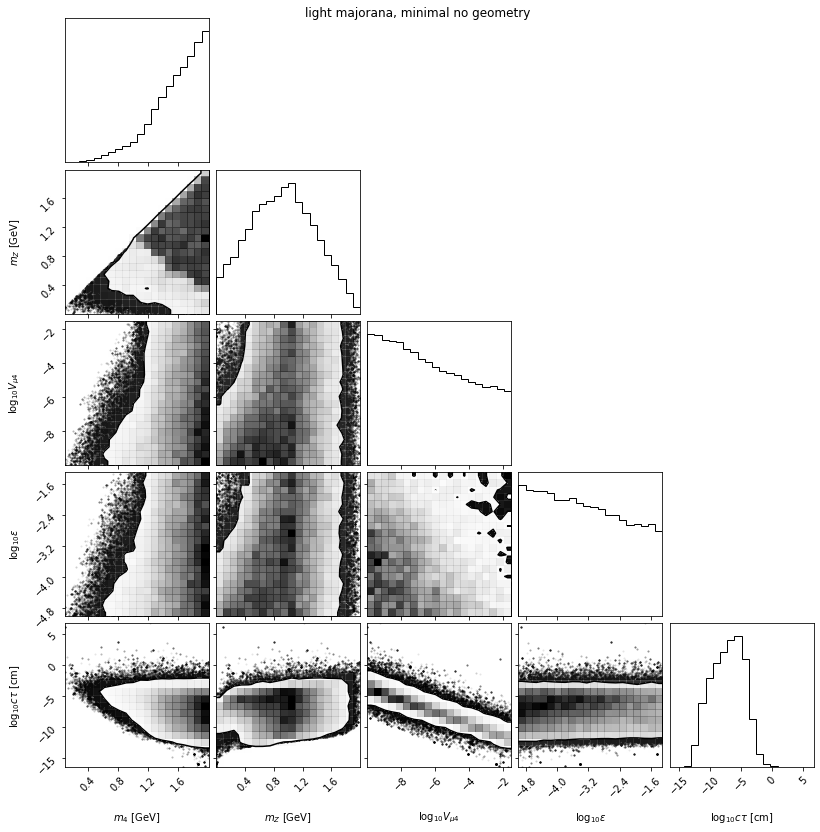

In [12]:
this_dark_nus_mcmc.corner_plot(['m4', 'mz', 'log10_Vmu4', 'log10_epsilon', 'log10_ctau'])

In [ ]:
this_dark_nus_mcmc.corner_plot_raw(savefile='raw_corner')

In [ ]:
this_dark_nus_mcmc.corner_plot_physics(savefile='physics_corner')

In [ ]:
this_dark_nus_mcmc.corner_plot(which_labels=['log10_m4', 'log10_mz', 'log10_Vmu4_alpha_epsilon2', 'log10_ctau'], 
                               savefile='log_corner')

In [ ]:
print('Fraction of samples with null expectation =', (this_dark_nus_mcmc.samples['mu'] == 0).sum()/len(this_dark_nus_mcmc.samples))

In [ ]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_mu', savefile='corner_log10_mu')

In [ ]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_sigma/mu', savefile='corner_log10_sigma_mu')

In [ ]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_ctau', savefile='corner_log10_ctau')